# Environment setting

In [1]:
# move to source directory
%pwd
%cd ../
%pwd
%ls

/home/yh/git/kaggle_ieee-fraud-detection
LICENSE*    data/                   log/          startup-jupyter.sh*
Makefile*   deprecated/             model/        test/
README.md*  feature/                notebook/     util/
config/     kaggle-submit-ieee.sh*  run_gbdt.py*


In [2]:
# import major modules
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
sys.stdout.flush()

In [20]:
# Set this
from config.config_0012 import config
dsize = '.small'
#dsize = ''
fold = 1
from util.easydict import EasyDict
c = EasyDict(config)

# Read data

In [21]:
c

{'runtime': {'VERSION': '0012', 'RANDOM_SEED': 42, 'USE_SMALL_DATA': False},
 'features': ['magic'],
 'model': {'TYPE': 'xgb',
  'params': {'booster': 'gbtree',
   'nthread': 4,
   'eta': 0.02,
   'gamma': 0,
   'max_depth': 12,
   'min_child_weight': 1,
   'subsample': 0.8,
   'colsample_bytree': 0.4,
   'tree_method': 'hist',
   'eval_metric': 'auc',
   'missing': nan}},
 'trainer': {'n_splits': 5,
  'num_boost_round': 5000,
  'early_stopping_rounds': 100},
 'slackauth': {'HOST': 'slack.com',
  'URL': '/api/chat.postMessage',
  'CHANNEL': 'ieee-fraud-detection',
  'NO_SEND_MESSAGE': False,
  'TOKEN_PATH': PosixPath('/root/.slack_token')}}

In [22]:
out_transformed_train_path = Path(f'data/feature/transformed_{c.runtime.VERSION}_train{dsize}.pkl')
out_transformed_test_path = Path(f'data/feature/transformed_{c.runtime.VERSION}_test{dsize}.pkl')
out_model_dir = Path(f'data/model/model_{c.runtime.VERSION}_{c.model.TYPE}{dsize}.pkl')
out_model_fold_dir = Path(f'data/model/model_{c.runtime.VERSION}_{c.model.TYPE}_fold{fold}{dsize}.pkl')
importance_path = Path(f'feature/importance/importance_{c.runtime.VERSION}{dsize}.csv')
out_sub_path = Path(f'data/submission/submission_{c.runtime.VERSION}{dsize}.csv')
main_log_path = Path(f'log/main_{c.runtime.VERSION}{dsize}.log')
train_log_path = Path(f'log/train_{c.runtime.VERSION}{dsize}.tsv')

In [23]:
log = pd.read_csv(train_log_path, delimiter='\t')
print(log.shape)
log.head()

(729, 4)


,fold,iteration,train_auc,val_auc
0,1,1,0.646259,0.559840
1,1,2,0.996599,0.795213
2,1,3,0.998299,0.797872
3,1,4,1.000000,0.779255
4,1,5,1.000000,0.773936


Text(0, 0.5, 'auc')

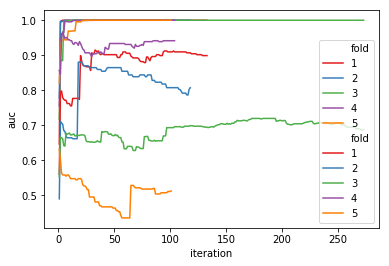

In [24]:
sns.lineplot(x="iteration", y="train_auc", data=log, palette=sns.color_palette("Set1",max(log['fold'])), hue='fold')
sns.lineplot(x="iteration", y="val_auc"  , data=log, palette=sns.color_palette("Set1",max(log['fold'])), hue='fold')
plt.ylabel('auc')

In [20]:
importance = pd.read_csv(importance_path)
importance.columns = ['feature', 'importance']
importance.head()

,feature,importance
0,TransactionAmt,134963.344862
1,ProductCD,30608.762266
2,card1,101806.869562
3,card2,94185.317119
4,card3,26996.293384


In [21]:
data = importance.sort_values(by="importance", ascending=False)[0:20]
data.head()

,feature,importance
135,V258,560445.970650
134,V257,483652.892179
24,C13,234159.999157
13,C1,227633.133752
25,C14,213000.236108


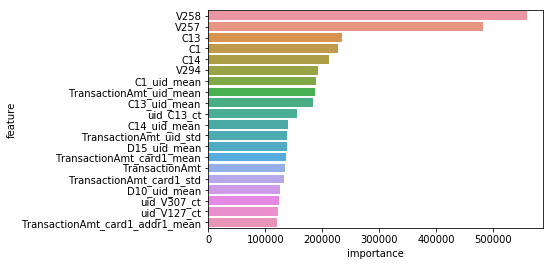

In [22]:
sns.barplot(x="importance", y="feature", data=data);

In [73]:
importance_path

PosixPath('/home/yh/git/kaggle_ieee-fraud-detection/feature/importance/importance_0010.csv')